In [10]:
import pandas as pd
ages = pd.DataFrame({'years': [10, 14, 30, 53, 67, 32, 45],
                    'name': ['A', 'B', 'C', 'D', 'E', 'F', 'G']})
ages

,years,name
0,10,A
1,14,B
2,30,C
3,53,D
4,67,E
5,32,F
6,45,G


In [2]:
pd.cut(ages['years'], 3)

0    (9.943, 29.0]
1    (9.943, 29.0]
2     (29.0, 48.0]
3     (48.0, 67.0]
4     (48.0, 67.0]
5     (29.0, 48.0]
6     (29.0, 48.0]
Name: years, dtype: category
Categories (3, interval[float64]): [(9.943, 29.0] < (29.0, 48.0] < (48.0, 67.0]]

In [3]:
pd.qcut(ages['years'], 3)

0    (9.999, 30.0]
1    (9.999, 30.0]
2    (9.999, 30.0]
3     (45.0, 67.0]
4     (45.0, 67.0]
5     (30.0, 45.0]
6     (30.0, 45.0]
Name: years, dtype: category
Categories (3, interval[float64]): [(9.999, 30.0] < (30.0, 45.0] < (45.0, 67.0]]

In [4]:
pd.cut?

In [5]:
pd.qcut?

In [6]:
klass = pd.cut(ages['years'], 3, labels=[0, 1, 2])
ages['label'] = klass
ages

,years,name,label
0,10,A,0
1,14,B,0
2,30,C,1
3,53,D,2
4,67,E,2
5,32,F,1
6,45,G,1


In [7]:
ages2 = pd.DataFrame({'years': [10, 14, 30, 53, 300, 32, 45],
                     'name': ['A', 'B', 'C', 'D', 'E', 'F', 'G']})
klass2 = pd.cut(ages2['years'], 3, labels=['Young', 'Middle', 'Senior'])
ages2['label'] = klass2
ages2

,years,name,label
0,10,A,Young
1,14,B,Young
2,30,C,Young
3,53,D,Young
4,300,E,Senior
5,32,F,Young
6,45,G,Young


In [8]:
# 通过离散化消除对离群值的影响
ages2 = pd.DataFrame({'years': [10, 14, 30, 53, 300, 32, 45],
                    'name': ['A', 'B', 'C', 'D', 'E', 'F', 'G']})
klass2 = pd.cut(ages2['years'], bins=[9, 30, 50, 300], labels=['Young', 'Middle', 'Senior'])
ages2['label'] = klass2
ages2

,years,name,label
0,10,A,Young
1,14,B,Young
2,30,C,Young
3,53,D,Senior
4,300,E,Senior
5,32,F,Middle
6,45,G,Middle


In [11]:
from sklearn.preprocessing import KBinsDiscretizer
kbd = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='uniform')
trans = kbd.fit_transform(ages[['years']])
ages['kbd'] = trans[:, 0]
ages

,years,name,kbd
0,10,A,0.0
1,14,B,0.0
2,30,C,1.0
3,53,D,2.0
4,67,E,2.0
5,32,F,1.0
6,45,G,1.0


In [13]:
KBinsDiscretizer?

# 项目案例

In [14]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
iris = load_iris()

In [15]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [16]:
X = iris.data
y = iris.target
X = X[:, [2, 3]]

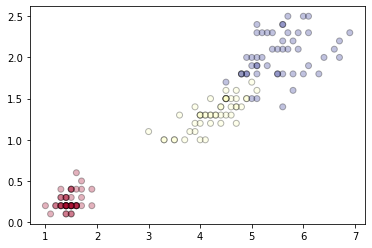

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.3, cmap=plt.cm.RdYlBu, edgecolors='black')

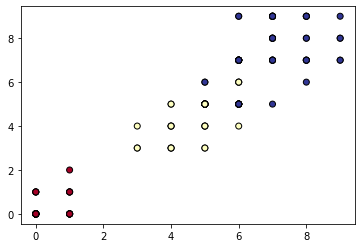

In [18]:
Xd = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='uniform').fit_transform(X)
plt.scatter(Xd[:, 0], Xd[:, 1], c=y, cmap=plt.cm.RdYlBu, edgecolors='black')

In [19]:
dtc = DecisionTreeClassifier(random_state=0)
score1 = cross_val_score(dtc, X, y, cv=5)
score2 = cross_val_score(dtc, Xd, y, cv=5)

In [20]:
np.mean(score1), np.std(score1)

(0.9466666666666667, 0.039999999999999994)

In [21]:
np.mean(score2), np.std(score2)

(0.96, 0.03265986323710903)

In [22]:
km = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='kmeans').fit_transform(X)
s = cross_val_score(dtc, km, y, cv=5)
np.mean(s), np.std(s)

(0.9733333333333334, 0.02494438257849294)

# 动手练习

In [23]:
import numpy as np
rnd = np.random.RandomState(42)
X = rnd.uniform(-3, 3, size=100)
y = np.sin(X) + rnd.normal(size=len(X)) / 3
X = X.reshape(-1, 1)

In [24]:
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

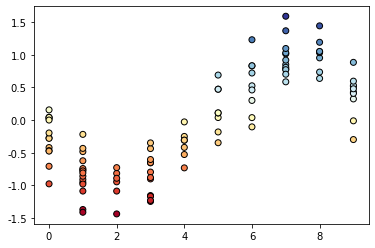

In [25]:
Xd = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='uniform').fit_transform(X)
plt.scatter(Xd[:,0], y, c=y, cmap=plt.cm.RdYlBu, edgecolors='black')

In [26]:
dtc = DecisionTreeClassifier(random_state=0)
score1 = cross_val_score(dtc, X, y, cv=5)
score2 = cross_val_score(dtc, Xd, y, cv=5)

/home/jeffery/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/jeffery/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/jeffery/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/home/jeffery/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 181, in fit
    check_classification_targets(y)
  File "/home/jeffery/anaconda3/lib/python3.8/site-packages/sklearn/utils/multiclass.py", line 172, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  warnings.warn("Estimator fit failed. The score on this train-te

In [27]:
np.mean(score1), np.std(score1)

(nan, nan)

Text(0.5, 1.0, '已离散化结果')

/home/jeffery/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 26410 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/jeffery/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 31163 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/jeffery/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 25955 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/jeffery/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 21270 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/jeffery/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 32467 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/jeffery/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_

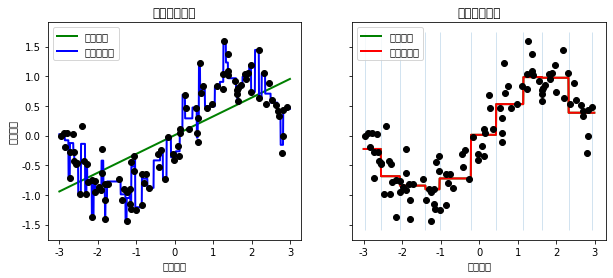

In [28]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.tree import DecisionTreeRegressor

# 离散化
kbd = KBinsDiscretizer(n_bins=10, encode='onehot')
X_binned = kbd.fit_transform(X)

# 利用线性回归模型对原始数据进行预测
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True, figsize=(10, 4))
line = np.linspace(-3, 3, 1000, endpoint=False).reshape(-1, 1)
lreg = LinearRegression().fit(X, y)
ax1.plot(line, lreg.predict(line), 
         linewidth=2, color='green', label='线性回归')
dreg = DecisionTreeRegressor(min_samples_split=3, random_state=0).fit(X, y)
ax1.plot(line, dreg.predict(line), 
         linewidth=2, color='blue', label="决策树回归")
ax1.plot(X[:, 0], y, 'o', c='k')
ax1.legend(loc='best')
ax1.set_ylabel("回归输出")
ax1.set_xlabel("输入特征")
ax1.set_title("未离散化结果")

# 对离散化之后的数据进行预测
line_binned = kbd.transform(line)
lreg_binned = LinearRegression().fit(X_binned, y)
ax2.plot(line, lreg_binned.predict(line_binned), 
         linewidth=2, color='green', 
         linestyle='-', label='线性回归')
dreg_binned = DecisionTreeRegressor(min_samples_split=3, random_state=0).fit(X_binned, y)
ax2.plot(line, dreg_binned.predict(line_binned), 
         linewidth=2, color='red', 
         linestyle='-', label="决策树回归")
ax2.plot(X[:, 0], y, 'o', c='k')
ax2.vlines(kbd.bin_edges_[0], *plt.gca().get_ylim(), linewidth=1, alpha=0.2)
ax2.legend(loc='best')
ax2.set_xlabel("输入特征")
ax2.set_title("已离散化结果")